# TAM analysis

## Libraries

In [166]:
import pandas as pd
from utils import load_or_download_csv
import geopandas as gpd
import matplotlib.pyplot as plt
from unidecode import unidecode

### Mapeo claves ent-mun viejas

In [167]:
# File path and Google Drive link
path = '../bases_depuradas/mapeo_clave_nombre.csv'
gdrive_link = 'https://drive.google.com/uc?export=download&id=1Nhp7C7of4u5dRXqnxnvOM89OAg4WSxEB'

try:
    df_mapeo = load_or_download_csv(path, gdrive_link)
    print(df_mapeo)
except Exception as e:
    print(f"Error: {str(e)}")



      cve_mun  cve_ent            municipio                          entidad
0           6        1  Pabellón de Arteaga                   Aguascalientes
1           1        1       Aguascalientes                   Aguascalientes
2           7        1      Rincón de Romos                   Aguascalientes
3           5        1          Jesús María                   Aguascalientes
4           3        1             Calvillo                   Aguascalientes
...       ...      ...                  ...                              ...
2455      448       20   Santa María Zaniza                           Oaxaca
2456       61       21         Eloxochitlán                           Puebla
2457       78       21  Huitzilan de Serdán                           Puebla
2458       19       30            Astacinga  Veracruz de Ignacio de la Llave
2459       68       31             Sinanché                          Yucatán

[2460 rows x 4 columns]


In [168]:
df_mapeo['cve_ent_str'] = df_mapeo['cve_ent'].astype(str)
df_mapeo['cve_mun_str'] = df_mapeo['cve_mun'].astype(str)

df_mapeo['cve_ent_str'] = df_mapeo['cve_ent_str'].apply(lambda x: '0'*(2-len(str(x))) + str(x) if len(str(x)) < 2 else x)
df_mapeo['cve_mun_str'] = df_mapeo['cve_mun_str'].apply(lambda x: '0'*(3-len(str(x))) + str(x) if len(str(x)) < 3 else x)

df_mapeo['ubica_geo'] = (df_mapeo['cve_ent_str'] + df_mapeo['cve_mun_str']).astype(int)
mapeo = df_mapeo[['ubica_geo', 'entidad', 'municipio']]
mapeo

,ubica_geo,entidad,municipio
0,1006,Aguascalientes,Pabellón de Arteaga
1,1001,Aguascalientes,Aguascalientes
2,1007,Aguascalientes,Rincón de Romos
3,1005,Aguascalientes,Jesús María
4,1003,Aguascalientes,Calvillo
...,...,...,...
2455,20448,Oaxaca,Santa María Zaniza
2456,21061,Puebla,Eloxochitlán
2457,21078,Puebla,Huitzilan de Serdán
2458,30019,Veracruz de Ignacio de la Llave,Astacinga


In [169]:
# File path and Google Drive link
path = '../bases_depuradas/gasto_granular.csv'
gdrive_link = 'https://drive.google.com/uc?export=download&id=1RlL0Ts_TDv1EJvrBSa-RPqrlyoAnNWbY'

try:
    df_gasto = load_or_download_csv(path, gdrive_link)
    df_gasto.head()
except Exception as e:
    print(f"Error: {str(e)}")

In [170]:
# Group by 'desc_ent' and 'desc_mun' and calculate the mean for the specified columns
gasto_raw = df_gasto.groupby(['desc_ent', 'desc_mun','ubica_geo'])[['cuidados', 'salud', 'atenc_ambu', 'hospital', 'medicinas',]].mean()
gasto_raw.sort_values(by = "medicinas", ascending = False,inplace = True)
gasto_raw.reset_index(inplace=True)
gasto_raw

,desc_ent,desc_mun,ubica_geo,cuidados,salud,atenc_ambu,hospital,medicinas
0,Jalisco,Tequila,14094,1080.644444,3203.145000,375.541111,0.000000,2827.603889
1,Jalisco,Ocotlan,14063,1557.422174,3152.065217,1397.584348,0.000000,1754.480870
2,Jalisco,Tenamaxtlan,14090,1402.720000,2754.239091,763.480909,269.910455,1720.847727
3,Querétaro,Landa De Matamoros,22010,1656.771842,3429.334211,1750.693684,0.000000,1678.640526
4,Hidalgo,Tlaxcoapan,13074,1243.516000,4159.616000,2785.754000,0.000000,1373.862000
...,...,...,...,...,...,...,...,...
1127,Tlaxcala,San Jeronimo Zacualpan,29051,513.227273,0.000000,0.000000,0.000000,0.000000
1128,Chihuahua,Rosario,8056,834.541111,476.085556,476.085556,0.000000,0.000000
1129,Chihuahua,La Cruz,8016,1622.150541,340.327838,340.327838,0.000000,0.000000
1130,Chihuahua,Julimes,8038,831.682500,1698.993750,1698.993750,0.000000,0.000000


In [171]:
gasto_raw[gasto_raw['ubica_geo'] == 30193]

,desc_ent,desc_mun,ubica_geo,cuidados,salud,atenc_ambu,hospital,medicinas
417,Veracruz de Ignacio de la Llave,Veracruz,30193,1639.739016,979.378962,691.560437,90.742842,197.075683


```gasto_raw```se ve bien

In [172]:
#read the shapefile mun21gw.shp
municipios = gpd.read_file('../raws/shp/municipios/mun21gw.shp')

In [173]:
#Rename CVGEO column to ubica_geo
municipios.rename(columns={'CVEGEO': 'ubica_geo'}, inplace=True)


In [174]:
municipios = municipios[['ubica_geo', 'NOM_ENT', 'NOM_MUN', 'geometry','AREA','PERIMETER']]
municipios

,ubica_geo,NOM_ENT,NOM_MUN,geometry,AREA,PERIMETER
0,01008,Aguascalientes,San JosÃ© de Gracia,"POLYGON ((-102.35385 22.12064, -102.35426 22.1...",857.790574,181537.599568
1,01009,Aguascalientes,TepezalÃ¡,"POLYGON ((-102.16213 22.34851, -102.16149 22.3...",229.661012,89329.531706
2,01010,Aguascalientes,El Llano,"POLYGON ((-101.89778 21.95839, -101.89037 21.9...",504.050989,144866.490027
3,01011,Aguascalientes,San Francisco de los Romo,"POLYGON ((-102.14088 22.07534, -102.14086 22.0...",137.770176,103689.065529
4,01001,Aguascalientes,Aguascalientes,"POLYGON ((-102.09775 22.02325, -102.09857 22.0...",1166.359248,256631.025247
...,...,...,...,...,...,...
2466,32014,Zacatecas,General Francisco R. MurguÃ­a,"POLYGON ((-102.89148 24.46084, -102.88558 24.4...",4783.818783,397050.472309
2467,32043,Zacatecas,SusticacÃ¡n,"POLYGON ((-103.10931 22.57209, -103.11083 22.5...",197.478110,90595.389398
2468,32045,Zacatecas,TepechitlÃ¡n,"POLYGON ((-103.1586 21.63311, -103.15928 21.63...",539.122963,147600.356438
2469,32046,Zacatecas,Tepetongo,"POLYGON ((-103.10931 22.57209, -103.11007 22.5...",716.921482,202202.709428


In [175]:
municipios['ubica_geo'] = municipios['ubica_geo'].astype(int)
municipios['ubica_geo']

0        1008
1        1009
2        1010
3        1011
4        1001
        ...  
2466    32014
2467    32043
2468    32045
2469    32046
2470    32047
Name: ubica_geo, Length: 2471, dtype: int64

In [176]:
#join gasto_municipio and municipios dataframes

gasto = gasto_raw.merge(municipios, on='ubica_geo', how='right')
gasto.drop(columns=['NOM_ENT','NOM_MUN'], inplace=True)
gasto

,desc_ent,desc_mun,ubica_geo,cuidados,salud,atenc_ambu,hospital,medicinas,geometry,AREA,PERIMETER
0,NaN,NaN,1008,NaN,NaN,NaN,NaN,NaN,"POLYGON ((-102.35385 22.12064, -102.35426 22.1...",857.790574,181537.599568
1,Aguascalientes,Tepezala,1009,1651.177857,4470.886250,4062.221607,233.035357,175.629286,"POLYGON ((-102.16213 22.34851, -102.16149 22.3...",229.661012,89329.531706
2,Aguascalientes,El Llano,1010,2343.694554,3629.101881,3047.979802,394.403168,186.718911,"POLYGON ((-101.89778 21.95839, -101.89037 21.9...",504.050989,144866.490027
3,Aguascalientes,San Francisco De Los Romo,1011,1605.504087,1281.153826,868.739130,167.409739,245.004957,"POLYGON ((-102.14088 22.07534, -102.14086 22.0...",137.770176,103689.065529
4,Aguascalientes,Aguascalientes,1001,2081.864819,1724.367999,1263.846898,220.551289,239.969812,"POLYGON ((-102.09775 22.02325, -102.09857 22.0...",1166.359248,256631.025247
...,...,...,...,...,...,...,...,...,...,...,...
2466,Zacatecas,General Francisco R. Murguia,32014,1332.494576,1157.821525,684.950932,344.546441,128.324153,"POLYGON ((-102.89148 24.46084, -102.88558 24.4...",4783.818783,397050.472309
2467,NaN,NaN,32043,NaN,NaN,NaN,NaN,NaN,"POLYGON ((-103.10931 22.57209, -103.11083 22.5...",197.478110,90595.389398
2468,Zacatecas,Tepechitlan,32045,1072.247647,3981.918235,3901.934118,3.452353,76.531765,"POLYGON ((-103.1586 21.63311, -103.15928 21.63...",539.122963,147600.356438
2469,Zacatecas,Tepetongo,32046,1661.420870,1470.997391,1003.859130,0.000000,467.138261,"POLYGON ((-103.10931 22.57209, -103.11007 22.5...",716.921482,202202.709428


```gasto``` se ve bien

In [177]:
mapeo_nuevo = pd.read_csv('../bases_depuradas/mapeo_nuevo_municipio.csv')

In [178]:
# File path and Google Drive link
path = '../bases_depuradas/censo_depurado.csv'
gdrive_link = 'https://drive.google.com/uc?export=download&id=1l0J7OMA-wafzSCoyr6qNhsXbXrtjDS4u'

try:
    df_censo = load_or_download_csv(path, gdrive_link)
    print(df_censo)

except Exception as e:
    print(f"Error: {str(e)}")

       Clave_Unica  ENTIDAD  MUNICIPIO  SECCION  Poblacion_Total  \
0         10010001        1          1        1             2564   
1         10010002        1          1        2              889   
2         10010003        1          1        3             2003   
3         10010004        1          1        4             1636   
4         10010005        1          1        5              808   
...            ...      ...        ...      ...              ...   
68801    320171907       32         17     1907             1027   
68802    320171908       32         17     1908             1589   
68803    320171909       32         17     1909              269   
68804    320391910       32         39     1910             2915   
68805    320391911       32         39     1911             3868   

       Poblacion_0_a_2_anios  Poblacion_Mayores_60  Poblacion_Afiliada_Salud  \
0                         36                   650                      2118   
1                      

In [180]:
mapeo_nuevo['ENTIDAD_str'] = mapeo_nuevo['entidad'].astype(str)
mapeo_nuevo['MUNICIPIO_str'] = mapeo_nuevo['municipio_cve'].astype(str)

mapeo_nuevo['ENTIDAD_str'] = mapeo_nuevo['ENTIDAD_str'].apply(lambda x: '0'*(2-len(str(x))) + str(x) if len(str(x)) < 2 else x)
mapeo_nuevo['MUNICIPIO_str'] = mapeo_nuevo['MUNICIPIO_str'].apply(lambda x: '0'*(3-len(str(x))) + str(x) if len(str(x)) < 3 else x)

mapeo_nuevo['ubica_geo'] = (mapeo_nuevo['ENTIDAD_str'] + mapeo_nuevo['MUNICIPIO_str']).astype(int)
mapeo_nuevo

,entidad,entidad_cve,municipio_cve,municipio,ENTIDAD_str,MUNICIPIO_str,ubica_geo
0,1,Aguascalientes,1,AGUASCALIENTES,01,001,1001
1,1,Aguascalientes,2,ASIENTOS,01,002,1002
2,1,Aguascalientes,3,CALVILLO,01,003,1003
3,1,Aguascalientes,4,COSIO,01,004,1004
4,1,Aguascalientes,5,JESUS MARIA,01,005,1005
...,...,...,...,...,...,...,...
2463,32,Zacatecas,54,VILLA HIDALGO,32,054,32054
2464,32,Zacatecas,55,VILLANUEVA,32,055,32055
2465,32,Zacatecas,56,ZACATECAS,32,056,32056
2466,32,Zacatecas,57,TRANCOSO,32,057,32057


In [181]:
mapeo_nuevo[mapeo_nuevo['ubica_geo'] == 30192]

,entidad,entidad_cve,municipio_cve,municipio,ENTIDAD_str,MUNICIPIO_str,ubica_geo
2284,30,Veracruz de Ignacio de la Llave,192,VERACRUZ,30,192,30192


In [182]:
mapeo_nuevo[mapeo_nuevo['ubica_geo'] == 19040]

,entidad,entidad_cve,municipio_cve,municipio,ENTIDAD_str,MUNICIPIO_str,ubica_geo
995,19,Nuevo León,40,MONTERREY,19,040,19040


In [183]:
censo_raw = df_censo.groupby(['ENTIDAD','MUNICIPIO']).sum()
censo_raw.reset_index(inplace=True)

censo_raw['ENTIDAD_str'] = censo_raw['ENTIDAD'].astype(str)
censo_raw['MUNICIPIO_str'] = censo_raw['MUNICIPIO'].astype(str)

censo_raw['ENTIDAD_str'] = censo_raw['ENTIDAD_str'].apply(lambda x: '0'*(2-len(str(x))) + str(x) if len(str(x)) < 2 else x)
censo_raw['MUNICIPIO_str'] = censo_raw['MUNICIPIO_str'].apply(lambda x: '0'*(3-len(str(x))) + str(x) if len(str(x)) < 3 else x)

censo_raw['ubica_geo'] = (censo_raw['ENTIDAD_str'] + censo_raw['MUNICIPIO_str']).astype(int)
censo_raw

,ENTIDAD,MUNICIPIO,Clave_Unica,SECCION,Poblacion_Total,Poblacion_0_a_2_anios,Poblacion_Mayores_60,Poblacion_Afiliada_Salud,Poblacion_Discapacidad,Poblacion_Economicamente_Activa,Viviendas_Particulares_Con_Caracteristicas,Viviendas_Con_Drenaje,ENTIDAD_str,MUNICIPIO_str,ubica_geo
0,1,1,4744875726,135726,942696,44175,102411,769637,47389,483478,264444,263328,01,001,1001
1,1,2,170345882,5882,51601,3174,4703,43985,2892,21470,12537,12078,01,002,1002
2,1,3,310941488,11488,58340,3162,7832,46413,4091,26038,15539,15427,01,003,1003
3,1,4,50201945,1945,16984,1032,1613,14639,804,7002,3926,3880,01,004,1004
4,1,5,221108865,8865,134795,7055,10296,106024,5084,68291,34900,34595,01,005,1005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2463,32,54,7693000764,40764,19459,1251,2128,16444,1401,6685,4952,4651,32,054,32054
2464,32,55,16348138637,88637,31623,1409,5648,23647,2135,13721,9049,8676,32,055,32055
2465,32,56,35582362797,202797,148829,6492,18639,123278,8415,72143,42077,41821,32,056,32056
2466,32,57,3526275825,5825,20455,1308,1785,17549,1020,8312,4668,4455,32,057,32057


In [184]:
censo = censo_raw.merge(mapeo_nuevo, on='ubica_geo', how='right')
censo.drop(columns=['ENTIDAD','MUNICIPIO','Clave_Unica','SECCION','ENTIDAD_str_x','MUNICIPIO_str_x','entidad','municipio_cve','ENTIDAD_str_y','MUNICIPIO_str_y'], inplace=True)

censo['municipio_key'] = censo['municipio'].apply(unidecode)
censo['municipio_key'] = censo['municipio_key'].apply(unidecode)
censo['municipio_key'] = censo['municipio_key'].str.replace(' ','')

censo['entidad_key'] = censo['entidad_cve'].apply(unidecode)
censo['entidad_key'] = censo['entidad_key'].str.replace(' ','')
censo['entidad_key'] = censo['entidad_key'].str.upper()

censo['key'] = censo['entidad_key'] + censo['municipio_key']
censo

,Poblacion_Total,Poblacion_0_a_2_anios,Poblacion_Mayores_60,Poblacion_Afiliada_Salud,Poblacion_Discapacidad,Poblacion_Economicamente_Activa,Viviendas_Particulares_Con_Caracteristicas,Viviendas_Con_Drenaje,ubica_geo,entidad_cve,municipio,municipio_key,entidad_key,key
0,942696,44175,102411,769637,47389,483478,264444,263328,1001,Aguascalientes,AGUASCALIENTES,AGUASCALIENTES,AGUASCALIENTES,AGUASCALIENTESAGUASCALIENTES
1,51601,3174,4703,43985,2892,21470,12537,12078,1002,Aguascalientes,ASIENTOS,ASIENTOS,AGUASCALIENTES,AGUASCALIENTESASIENTOS
2,58340,3162,7832,46413,4091,26038,15539,15427,1003,Aguascalientes,CALVILLO,CALVILLO,AGUASCALIENTES,AGUASCALIENTESCALVILLO
3,16984,1032,1613,14639,804,7002,3926,3880,1004,Aguascalientes,COSIO,COSIO,AGUASCALIENTES,AGUASCALIENTESCOSIO
4,134795,7055,10296,106024,5084,68291,34900,34595,1005,Aguascalientes,JESUS MARIA,JESUSMARIA,AGUASCALIENTES,AGUASCALIENTESJESUSMARIA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2463,19459,1251,2128,16444,1401,6685,4952,4651,32054,Zacatecas,VILLA HIDALGO,VILLAHIDALGO,ZACATECAS,ZACATECASVILLAHIDALGO
2464,31623,1409,5648,23647,2135,13721,9049,8676,32055,Zacatecas,VILLANUEVA,VILLANUEVA,ZACATECAS,ZACATECASVILLANUEVA
2465,148829,6492,18639,123278,8415,72143,42077,41821,32056,Zacatecas,ZACATECAS,ZACATECAS,ZACATECAS,ZACATECASZACATECAS
2466,20455,1308,1785,17549,1020,8312,4668,4455,32057,Zacatecas,TRANCOSO,TRANCOSO,ZACATECAS,ZACATECASTRANCOSO


In [185]:
#if not nan, apply unidecode

gasto['municipio_key'] = gasto['desc_mun'].apply(lambda x: unidecode(x) if pd.notna(x) else x)
gasto['municipio_key'] = gasto['municipio_key'].str.replace(' ','')
gasto['municipio_key'] = gasto['municipio_key'].str.upper()

gasto['entidad_key'] = gasto['desc_ent'].apply(lambda x: unidecode(x) if pd.notna(x) else x)
gasto['entidad_key'] = gasto['entidad_key'].str.replace(' ','')
gasto['entidad_key'] = gasto['entidad_key'].str.upper()
gasto['key'] = gasto['entidad_key'] + gasto['municipio_key']
gasto

,desc_ent,desc_mun,ubica_geo,cuidados,salud,atenc_ambu,hospital,medicinas,geometry,AREA,PERIMETER,municipio_key,entidad_key,key
0,NaN,NaN,1008,NaN,NaN,NaN,NaN,NaN,"POLYGON ((-102.35385 22.12064, -102.35426 22.1...",857.790574,181537.599568,NaN,NaN,NaN
1,Aguascalientes,Tepezala,1009,1651.177857,4470.886250,4062.221607,233.035357,175.629286,"POLYGON ((-102.16213 22.34851, -102.16149 22.3...",229.661012,89329.531706,TEPEZALA,AGUASCALIENTES,AGUASCALIENTESTEPEZALA
2,Aguascalientes,El Llano,1010,2343.694554,3629.101881,3047.979802,394.403168,186.718911,"POLYGON ((-101.89778 21.95839, -101.89037 21.9...",504.050989,144866.490027,ELLLANO,AGUASCALIENTES,AGUASCALIENTESELLLANO
3,Aguascalientes,San Francisco De Los Romo,1011,1605.504087,1281.153826,868.739130,167.409739,245.004957,"POLYGON ((-102.14088 22.07534, -102.14086 22.0...",137.770176,103689.065529,SANFRANCISCODELOSROMO,AGUASCALIENTES,AGUASCALIENTESSANFRANCISCODELOSROMO
4,Aguascalientes,Aguascalientes,1001,2081.864819,1724.367999,1263.846898,220.551289,239.969812,"POLYGON ((-102.09775 22.02325, -102.09857 22.0...",1166.359248,256631.025247,AGUASCALIENTES,AGUASCALIENTES,AGUASCALIENTESAGUASCALIENTES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2466,Zacatecas,General Francisco R. Murguia,32014,1332.494576,1157.821525,684.950932,344.546441,128.324153,"POLYGON ((-102.89148 24.46084, -102.88558 24.4...",4783.818783,397050.472309,GENERALFRANCISCOR.MURGUIA,ZACATECAS,ZACATECASGENERALFRANCISCOR.MURGUIA
2467,NaN,NaN,32043,NaN,NaN,NaN,NaN,NaN,"POLYGON ((-103.10931 22.57209, -103.11083 22.5...",197.478110,90595.389398,NaN,NaN,NaN
2468,Zacatecas,Tepechitlan,32045,1072.247647,3981.918235,3901.934118,3.452353,76.531765,"POLYGON ((-103.1586 21.63311, -103.15928 21.63...",539.122963,147600.356438,TEPECHITLAN,ZACATECAS,ZACATECASTEPECHITLAN
2469,Zacatecas,Tepetongo,32046,1661.420870,1470.997391,1003.859130,0.000000,467.138261,"POLYGON ((-103.10931 22.57209, -103.11007 22.5...",716.921482,202202.709428,TEPETONGO,ZACATECAS,ZACATECASTEPETONGO


In [189]:
merged_df = gasto.merge(censo, on='key', suffixes=('_gasto', '_censo'), how='left') 
merged_df.head(3)

,desc_ent,desc_mun,ubica_geo_gasto,cuidados,salud,atenc_ambu,hospital,medicinas,geometry,AREA,...,Poblacion_Afiliada_Salud,Poblacion_Discapacidad,Poblacion_Economicamente_Activa,Viviendas_Particulares_Con_Caracteristicas,Viviendas_Con_Drenaje,ubica_geo_censo,entidad_cve,municipio,municipio_key_censo,entidad_key_censo
0,NaN,NaN,1008,NaN,NaN,NaN,NaN,NaN,"POLYGON ((-102.35385 22.12064, -102.35426 22.1...",857.790574,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Aguascalientes,Tepezala,1009,1651.177857,4470.886250,4062.221607,233.035357,175.629286,"POLYGON ((-102.16213 22.34851, -102.16149 22.3...",229.661012,...,19182.0,1073.0,9258.0,5449.0,5332.0,1009.0,Aguascalientes,TEPEZALA,TEPEZALA,AGUASCALIENTES
2,Aguascalientes,El Llano,1010,2343.694554,3629.101881,3047.979802,394.403168,186.718911,"POLYGON ((-101.89778 21.95839, -101.89037 21.9...",504.050989,...,16259.0,1138.0,8656.0,5201.0,5004.0,1011.0,Aguascalientes,EL LLANO,ELLLANO,AGUASCALIENTES


In [192]:
merged_df.columns

Index(['desc_ent', 'desc_mun', 'ubica_geo_gasto', 'cuidados', 'salud',
       'atenc_ambu', 'hospital', 'medicinas', 'geometry', 'AREA', 'PERIMETER',
       'municipio_key_gasto', 'entidad_key_gasto', 'key', 'Poblacion_Total',
       'Poblacion_0_a_2_anios', 'Poblacion_Mayores_60',
       'Poblacion_Afiliada_Salud', 'Poblacion_Discapacidad',
       'Poblacion_Economicamente_Activa',
       'Viviendas_Particulares_Con_Caracteristicas', 'Viviendas_Con_Drenaje',
       'ubica_geo_censo', 'entidad_cve', 'municipio', 'municipio_key_censo',
       'entidad_key_censo'],
      dtype='object')

In [193]:
merged_df.drop(columns=['municipio_key_gasto', 'entidad_key_gasto', 'entidad_cve', 'municipio', 'municipio_key_censo',
       'entidad_key_censo'], inplace=True)
merged_df

,desc_ent,desc_mun,ubica_geo_gasto,cuidados,salud,atenc_ambu,hospital,medicinas,geometry,AREA,...,key,Poblacion_Total,Poblacion_0_a_2_anios,Poblacion_Mayores_60,Poblacion_Afiliada_Salud,Poblacion_Discapacidad,Poblacion_Economicamente_Activa,Viviendas_Particulares_Con_Caracteristicas,Viviendas_Con_Drenaje,ubica_geo_censo
0,NaN,NaN,1008,NaN,NaN,NaN,NaN,NaN,"POLYGON ((-102.35385 22.12064, -102.35426 22.1...",857.790574,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Aguascalientes,Tepezala,1009,1651.177857,4470.886250,4062.221607,233.035357,175.629286,"POLYGON ((-102.16213 22.34851, -102.16149 22.3...",229.661012,...,AGUASCALIENTESTEPEZALA,22636.0,1258.0,2169.0,19182.0,1073.0,9258.0,5449.0,5332.0,1009.0
2,Aguascalientes,El Llano,1010,2343.694554,3629.101881,3047.979802,394.403168,186.718911,"POLYGON ((-101.89778 21.95839, -101.89037 21.9...",504.050989,...,AGUASCALIENTESELLLANO,20819.0,1265.0,1987.0,16259.0,1138.0,8656.0,5201.0,5004.0,1011.0
3,Aguascalientes,San Francisco De Los Romo,1011,1605.504087,1281.153826,868.739130,167.409739,245.004957,"POLYGON ((-102.14088 22.07534, -102.14086 22.0...",137.770176,...,AGUASCALIENTESSANFRANCISCODELOSROMO,64147.0,3854.0,3744.0,52969.0,2359.0,30545.0,16869.0,16774.0,1010.0
4,Aguascalientes,Aguascalientes,1001,2081.864819,1724.367999,1263.846898,220.551289,239.969812,"POLYGON ((-102.09775 22.02325, -102.09857 22.0...",1166.359248,...,AGUASCALIENTESAGUASCALIENTES,942696.0,44175.0,102411.0,769637.0,47389.0,483478.0,264444.0,263328.0,1001.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2467,Zacatecas,General Francisco R. Murguia,32014,1332.494576,1157.821525,684.950932,344.546441,128.324153,"POLYGON ((-102.89148 24.46084, -102.88558 24.4...",4783.818783,...,ZACATECASGENERALFRANCISCOR.MURGUIA,20188.0,1026.0,3136.0,16988.0,1344.0,7295.0,5401.0,5088.0,32014.0
2468,NaN,NaN,32043,NaN,NaN,NaN,NaN,NaN,"POLYGON ((-103.10931 22.57209, -103.11083 22.5...",197.478110,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2469,Zacatecas,Tepechitlan,32045,1072.247647,3981.918235,3901.934118,3.452353,76.531765,"POLYGON ((-103.1586 21.63311, -103.15928 21.63...",539.122963,...,ZACATECASTEPECHITLAN,8323.0,446.0,1490.0,6745.0,560.0,3337.0,2552.0,2510.0,32045.0
2470,Zacatecas,Tepetongo,32046,1661.420870,1470.997391,1003.859130,0.000000,467.138261,"POLYGON ((-103.10931 22.57209, -103.11007 22.5...",716.921482,...,ZACATECASTEPETONGO,6490.0,248.0,1634.0,5241.0,676.0,2242.0,2065.0,2018.0,32046.0


In [216]:
inst_salud = gpd.read_file('../raws/shp/denue_00_62_shp/conjunto_de_datos/denue_inegi_62_.shp')
inst_salud

,id,clee,nom_estab,raz_social,codigo_act,nombre_act,per_ocu,tipo_vial,nom_vial,tipo_v_e_1,...,ageb,manzana,telefono,correoelec,www,tipoUniEco,latitud,longitud,fecha_alta,geometry
0,101363,02001621211002581000000000U5,DENTISTA MILITAR,None,621211,Consultorios dentales del sector privado,0 a 5 personas,CALLE,RIO BLANCO,CALLE,...,7964,044,6462130920,None,None,Fijo,31.845642,-116.601959,2014-12,POINT (-116.60196 31.84564)
1,69228,02004621211002811000000000U0,DENTISTA LOMELI,None,621211,Consultorios dentales del sector privado,0 a 5 personas,AVENIDA,BUCARELI,CALLE,...,0598,007,6646376106,None,None,Fijo,32.489294,-117.041228,2010-07,POINT (-117.04123 32.48929)
2,7049128,02004621211016431000000000U1,DENTISTA OASIS,None,621211,Consultorios dentales del sector privado,0 a 5 personas,BOULEVARD,REAL DE BAJA CALIFORNIA,BOULEVARD,...,728A,006,6643444741,None,None,Fijo,32.486737,-116.848466,2019-11,POINT (-116.84847 32.48674)
3,6914702,02002621211011581000000000U2,DENTISTA NIÑOS Y ADULTOS,None,621211,Consultorios dentales del sector privado,0 a 5 personas,CALLE,RIO CULIACAN,AVENIDA,...,0269,025,None,None,None,Fijo,32.653502,-115.432872,2019-11,POINT (-115.43287 32.6535)
4,6959384,02004621211019351000000000U8,DENTISTA FIMBRES,None,621211,Consultorios dentales del sector privado,0 a 5 personas,CALLE,DIAZ MIRON (CUARTA),CALLE,...,0051,003,None,None,None,Fijo,32.532308,-117.042847,2019-11,POINT (-117.04285 32.53231)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235217,4641855,32024624232000013001000000U0,MODULO DE PROTECCION CIVIL MUNICIPAL,PRESIDENCIA MUNICIPAL LORETO ZACATECAS,624232,Servicios de emergencia comunitarios prestados...,6 a 10 personas,CALLE,ADOLFO LOPEZ MATEOS,CALLE,...,0322,016,None,None,None,Fijo,22.276974,-101.990382,2014-12,POINT (-101.99038 22.27697)
235218,4616853,32024622112000011010000000U0,MODULO DE SALUD IMSS BIENESTART,GOBIERNO FEDERAL,621112,Consultorios de medicina general del sector pú...,0 a 5 personas,CALLE,VENUSTIANO CARRANZA,CALLE,...,0214,028,None,None,None,Fijo,22.270811,-101.984673,2010-07,POINT (-101.98467 22.27081)
235219,4631212,32056624112000031000000000U8,CENTRO SOCIAL BUENAVISTA,CENTRO SOCIAL BUENAVISTA,624112,Servicios de orientación y trabajo social para...,0 a 5 personas,CALLE,NINGUNO,CALLE,...,0684,022,None,None,None,Fijo,22.761726,-102.574939,2014-12,POINT (-102.57494 22.76173)
235220,4603467,32039621111000131000000000U7,CONSULTORIO MEDICO GENERAL,None,621111,Consultorios de medicina general del sector pr...,0 a 5 personas,CALLE,CORREGIDORA,CALLEJON,...,0575,030,None,None,None,Fijo,23.828489,-103.034314,2010-07,POINT (-103.03431 23.82849)


In [217]:
inst_salud['codigo_act'] = inst_salud['codigo_act'].astype(str)
#codes that begin with '621' or '622'

inst_salud = inst_salud[inst_salud['codigo_act'].str.startswith('621') | inst_salud['codigo_act'].str.startswith('622')]
inst_salud

,id,clee,nom_estab,raz_social,codigo_act,nombre_act,per_ocu,tipo_vial,nom_vial,tipo_v_e_1,...,ageb,manzana,telefono,correoelec,www,tipoUniEco,latitud,longitud,fecha_alta,geometry
0,101363,02001621211002581000000000U5,DENTISTA MILITAR,None,621211,Consultorios dentales del sector privado,0 a 5 personas,CALLE,RIO BLANCO,CALLE,...,7964,044,6462130920,None,None,Fijo,31.845642,-116.601959,2014-12,POINT (-116.60196 31.84564)
1,69228,02004621211002811000000000U0,DENTISTA LOMELI,None,621211,Consultorios dentales del sector privado,0 a 5 personas,AVENIDA,BUCARELI,CALLE,...,0598,007,6646376106,None,None,Fijo,32.489294,-117.041228,2010-07,POINT (-117.04123 32.48929)
2,7049128,02004621211016431000000000U1,DENTISTA OASIS,None,621211,Consultorios dentales del sector privado,0 a 5 personas,BOULEVARD,REAL DE BAJA CALIFORNIA,BOULEVARD,...,728A,006,6643444741,None,None,Fijo,32.486737,-116.848466,2019-11,POINT (-116.84847 32.48674)
3,6914702,02002621211011581000000000U2,DENTISTA NIÑOS Y ADULTOS,None,621211,Consultorios dentales del sector privado,0 a 5 personas,CALLE,RIO CULIACAN,AVENIDA,...,0269,025,None,None,None,Fijo,32.653502,-115.432872,2019-11,POINT (-115.43287 32.6535)
4,6959384,02004621211019351000000000U8,DENTISTA FIMBRES,None,621211,Consultorios dentales del sector privado,0 a 5 personas,CALLE,DIAZ MIRON (CUARTA),CALLE,...,0051,003,None,None,None,Fijo,32.532308,-117.042847,2019-11,POINT (-117.04285 32.53231)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235214,7453746,32010621111001241000000000U4,CONSULTORIO MEDICO GENERAL,None,621111,Consultorios de medicina general del sector pr...,0 a 5 personas,CALLE,SEGUNDA DE SONORA,CALLE,...,2501,024,4931046945,None,None,Fijo,23.178967,-102.876495,2019-11,POINT (-102.8765 23.17897)
235216,8463084,32056621111000791000000000S2,MODULO CRUZ ROJA MEXICANA ZACATECAS,None,621111,Consultorios de medicina general del sector pr...,0 a 5 personas,CALLE,BENITO JUAREZ GARCIA,CALLE,...,0665,030,4929223323,CROJAZAC@YAHOO.COM.MX,None,Fijo,22.769764,-102.590963,2019-11,POINT (-102.59096 22.76976)
235218,4616853,32024622112000011010000000U0,MODULO DE SALUD IMSS BIENESTART,GOBIERNO FEDERAL,621112,Consultorios de medicina general del sector pú...,0 a 5 personas,CALLE,VENUSTIANO CARRANZA,CALLE,...,0214,028,None,None,None,Fijo,22.270811,-101.984673,2010-07,POINT (-101.98467 22.27081)
235220,4603467,32039621111000131000000000U7,CONSULTORIO MEDICO GENERAL,None,621111,Consultorios de medicina general del sector pr...,0 a 5 personas,CALLE,CORREGIDORA,CALLEJON,...,0575,030,None,None,None,Fijo,23.828489,-103.034314,2010-07,POINT (-103.03431 23.82849)


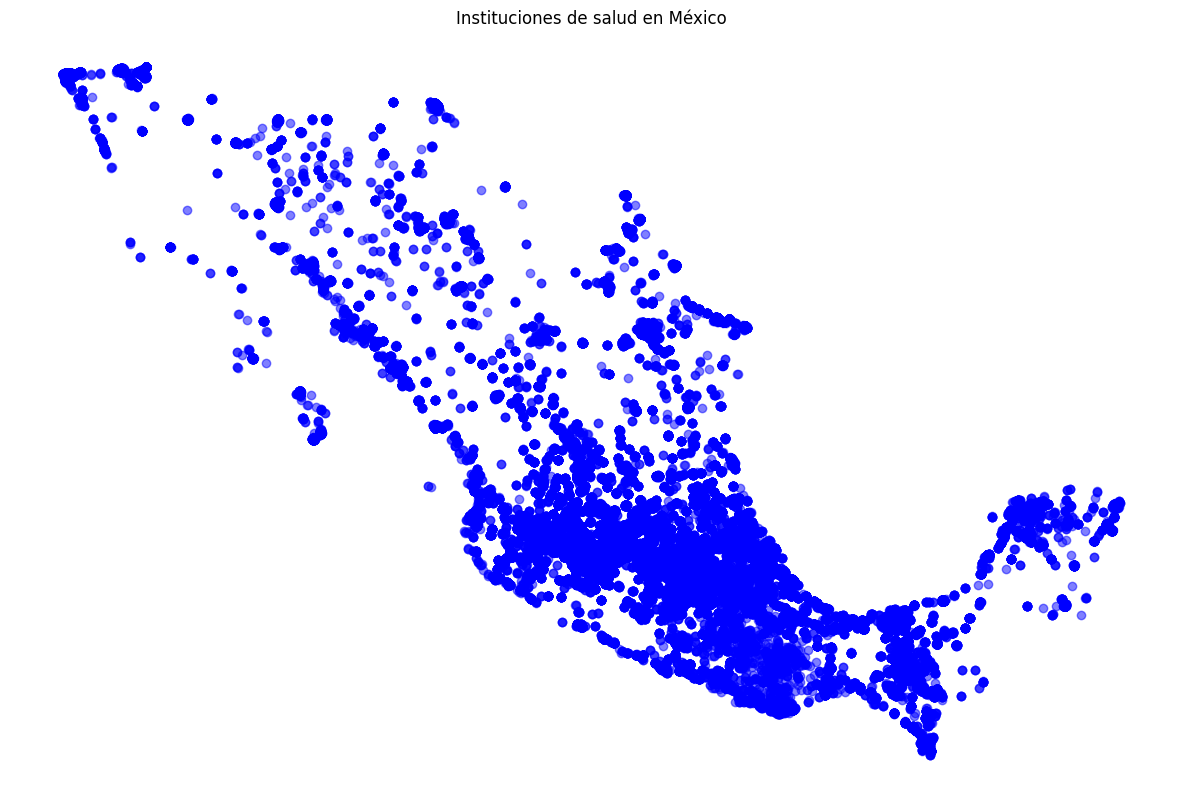

In [218]:
fig, ax = plt.subplots(figsize=(15, 15))
inst_salud.plot(ax=ax, color='blue', alpha=0.5)
plt.title('Instituciones de salud en México')
plt.axis('off')
plt.show()

In [219]:
inst_salud['cve_ent'] = inst_salud['cve_ent'].astype(str)
inst_salud['cve_mun'] = inst_salud['cve_mun'].astype(str)

inst_salud['ubica_geo'] = (inst_salud['cve_ent'] + inst_salud['cve_mun']).astype(int)
inst_salud

/Users/gerardoguerrero/anaconda3/envs/dataton/lib/python3.11/site-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/gerardoguerrero/anaconda3/envs/dataton/lib/python3.11/site-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/gerardoguerrero/anaconda3/envs/dataton/lib/python3.11/site-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is

,id,clee,nom_estab,raz_social,codigo_act,nombre_act,per_ocu,tipo_vial,nom_vial,tipo_v_e_1,...,manzana,telefono,correoelec,www,tipoUniEco,latitud,longitud,fecha_alta,geometry,ubica_geo
0,101363,02001621211002581000000000U5,DENTISTA MILITAR,None,621211,Consultorios dentales del sector privado,0 a 5 personas,CALLE,RIO BLANCO,CALLE,...,044,6462130920,None,None,Fijo,31.845642,-116.601959,2014-12,POINT (-116.60196 31.84564),2001
1,69228,02004621211002811000000000U0,DENTISTA LOMELI,None,621211,Consultorios dentales del sector privado,0 a 5 personas,AVENIDA,BUCARELI,CALLE,...,007,6646376106,None,None,Fijo,32.489294,-117.041228,2010-07,POINT (-117.04123 32.48929),2004
2,7049128,02004621211016431000000000U1,DENTISTA OASIS,None,621211,Consultorios dentales del sector privado,0 a 5 personas,BOULEVARD,REAL DE BAJA CALIFORNIA,BOULEVARD,...,006,6643444741,None,None,Fijo,32.486737,-116.848466,2019-11,POINT (-116.84847 32.48674),2004
3,6914702,02002621211011581000000000U2,DENTISTA NIÑOS Y ADULTOS,None,621211,Consultorios dentales del sector privado,0 a 5 personas,CALLE,RIO CULIACAN,AVENIDA,...,025,None,None,None,Fijo,32.653502,-115.432872,2019-11,POINT (-115.43287 32.6535),2002
4,6959384,02004621211019351000000000U8,DENTISTA FIMBRES,None,621211,Consultorios dentales del sector privado,0 a 5 personas,CALLE,DIAZ MIRON (CUARTA),CALLE,...,003,None,None,None,Fijo,32.532308,-117.042847,2019-11,POINT (-117.04285 32.53231),2004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235214,7453746,32010621111001241000000000U4,CONSULTORIO MEDICO GENERAL,None,621111,Consultorios de medicina general del sector pr...,0 a 5 personas,CALLE,SEGUNDA DE SONORA,CALLE,...,024,4931046945,None,None,Fijo,23.178967,-102.876495,2019-11,POINT (-102.8765 23.17897),32010
235216,8463084,32056621111000791000000000S2,MODULO CRUZ ROJA MEXICANA ZACATECAS,None,621111,Consultorios de medicina general del sector pr...,0 a 5 personas,CALLE,BENITO JUAREZ GARCIA,CALLE,...,030,4929223323,CROJAZAC@YAHOO.COM.MX,None,Fijo,22.769764,-102.590963,2019-11,POINT (-102.59096 22.76976),32056
235218,4616853,32024622112000011010000000U0,MODULO DE SALUD IMSS BIENESTART,GOBIERNO FEDERAL,621112,Consultorios de medicina general del sector pú...,0 a 5 personas,CALLE,VENUSTIANO CARRANZA,CALLE,...,028,None,None,None,Fijo,22.270811,-101.984673,2010-07,POINT (-101.98467 22.27081),32024
235220,4603467,32039621111000131000000000U7,CONSULTORIO MEDICO GENERAL,None,621111,Consultorios de medicina general del sector pr...,0 a 5 personas,CALLE,CORREGIDORA,CALLEJON,...,030,None,None,None,Fijo,23.828489,-103.034314,2010-07,POINT (-103.03431 23.82849),32039


In [220]:
inst_salud = inst_salud[[
    'nom_estab',
    'codigo_act',
    'nombre_act',
    'ubica_geo',
    'entidad',
    'municipio',
    'latitud',
    'longitud',
    'geometry', 
]]
inst_salud

,nom_estab,codigo_act,nombre_act,ubica_geo,entidad,municipio,latitud,longitud,geometry
0,DENTISTA MILITAR,621211,Consultorios dentales del sector privado,2001,Baja California,Ensenada,31.845642,-116.601959,POINT (-116.60196 31.84564)
1,DENTISTA LOMELI,621211,Consultorios dentales del sector privado,2004,Baja California,Tijuana,32.489294,-117.041228,POINT (-117.04123 32.48929)
2,DENTISTA OASIS,621211,Consultorios dentales del sector privado,2004,Baja California,Tijuana,32.486737,-116.848466,POINT (-116.84847 32.48674)
3,DENTISTA NIÑOS Y ADULTOS,621211,Consultorios dentales del sector privado,2002,Baja California,Mexicali,32.653502,-115.432872,POINT (-115.43287 32.6535)
4,DENTISTA FIMBRES,621211,Consultorios dentales del sector privado,2004,Baja California,Tijuana,32.532308,-117.042847,POINT (-117.04285 32.53231)
...,...,...,...,...,...,...,...,...,...
235214,CONSULTORIO MEDICO GENERAL,621111,Consultorios de medicina general del sector pr...,32010,Zacatecas,Fresnillo,23.178967,-102.876495,POINT (-102.8765 23.17897)
235216,MODULO CRUZ ROJA MEXICANA ZACATECAS,621111,Consultorios de medicina general del sector pr...,32056,Zacatecas,Zacatecas,22.769764,-102.590963,POINT (-102.59096 22.76976)
235218,MODULO DE SALUD IMSS BIENESTART,621112,Consultorios de medicina general del sector pú...,32024,Zacatecas,Loreto,22.270811,-101.984673,POINT (-101.98467 22.27081)
235220,CONSULTORIO MEDICO GENERAL,621111,Consultorios de medicina general del sector pr...,32039,Zacatecas,Río Grande,23.828489,-103.034314,POINT (-103.03431 23.82849)


In [223]:
#count the number of health institutions in each municipality
inst_salud_count = inst_salud.groupby('ubica_geo').size().reset_index(name='num_inst_salud')
inst_salud_count.sort_values(by='num_inst_salud', ascending=False)

,ubica_geo,num_inst_salud
578,14039,4686
1680,21114,4147
997,19039,3956
14,2004,3452
347,11020,3108
...,...,...
1701,21135,1
1001,19043,1
1008,19050,1
2011,28036,1


In [222]:
farmacias = gpd.read_file('../raws/shp/denue_00_46321-46531_shp/conjunto_de_datos/denue_inegi_46321-46531_.shp')
farmacias

,id,clee,nom_estab,raz_social,codigo_act,nombre_act,per_ocu,tipo_vial,nom_vial,tipo_v_e_1,...,ageb,manzana,telefono,correoelec,www,tipoUniEco,latitud,longitud,fecha_alta,geometry
0,101019,02001463211005221010000000U6,EQUIS TACTICAL,None,463214,"Comercio al por menor de disfraces, vestimenta...",0 a 5 personas,AVENIDA,MEXICO,CALLE,...,7911,018,6462051705,None,None,Fijo,31.852742,-116.591921,2014-12,POINT (-116.59192 31.85274)
1,112952,02004464111005121000000000U3,EQUILIBRIO FARMACEUTICOS,EQUILIBRIO FARMACEUTICOS,464111,Farmacias sin minisúper,0 a 5 personas,CALLE,LA ESCONDIDA Y/O LAGUNA HANSON,CALLEJON,...,0579,081,6641040313,EQFTIJUANA2@EQUILIBRIOFARMACEUTICO.COM.MX,None,Fijo,32.507295,-116.957871,2014-12,POINT (-116.95787 32.5073)
2,56435,02002463211005242000000000U0,ESCENA BOUTIQUE,None,463211,"Comercio al por menor de ropa, excepto de bebé...",6 a 10 personas,BOULEVARD,NINGUNO,BOULEVARD,...,4238,035,6865542390,None,None,Fijo,32.659973,-115.480589,2010-07,POINT (-115.48059 32.65997)
3,76548,02001465112000121000000000U1,ERICKS JOYERIA,None,465112,Comercio al por menor de artículos de joyería ...,0 a 5 personas,AVENIDA,REFORMA,CALLE,...,7790,044,None,None,None,Fijo,31.871234,-116.608694,2010-07,POINT (-116.60869 31.87123)
4,6734444,02004464111006271001000000S5,EQUILIBRIO FARMACEUTICO,EQUILIBRIO FARMACEUTICO SA DE CV,464111,Farmacias sin minisúper,6 a 10 personas,CALLE,ALAMO,CALLE,...,0579,078,None,None,None,Fijo,32.505090,-116.954087,2016-10,POINT (-116.95409 32.50509)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
570346,4607995,32042463310000171000000000U6,ZAPATERIA EL CAMBIO,None,463310,Comercio al por menor de calzado,0 a 5 personas,CALLE,SAN FRANCISCO,CALLE,...,1009,024,None,None,None,Fijo,23.632857,-103.640776,2010-07,POINT (-103.64078 23.63286)
570347,7109095,32038463310000181000000000U3,ZAPATERIA EL BARATILLO,None,463310,Comercio al por menor de calzado,0 a 5 personas,CALLE,PLAZA PRINCIPAL,CALLE,...,0563,009,None,None,None,Fijo,22.298364,-101.575223,2019-11,POINT (-101.57522 22.29836)
570348,4593693,32051463310000081000000000U8,ZAPATERIA EL BARATILLO,None,463310,Comercio al por menor de calzado,0 a 5 personas,CALLE,ALDAMA,AVENIDA,...,0739,005,None,None,None,Fijo,23.293405,-102.348365,2010-07,POINT (-102.34837 23.29341)
570349,4628165,32020463310000571000000000U3,ZAPATERIA EL BARATILLO,None,463310,Comercio al por menor de calzado,0 a 5 personas,CALLE,PLAZA PRINCIPAL,CALLE,...,0234,007,None,None,None,Fijo,22.649016,-102.989702,2014-12,POINT (-102.9897 22.64902)


In [224]:
denues = farmacias.copy()
denues['codigo_act'] = denues['codigo_act'].astype(str)


In [225]:
farmacias = denues[denues['codigo_act'].str.startswith('464111') | denues['codigo_act'].str.startswith('464112')]

In [226]:
farmacias['cve_ent'] = farmacias['cve_ent'].astype(str)
farmacias['cve_mun'] = farmacias['cve_mun'].astype(str)

farmacias['ubica_geo'] = (farmacias['cve_ent'] + farmacias['cve_mun']).astype(int)
farmacias

/Users/gerardoguerrero/anaconda3/envs/dataton/lib/python3.11/site-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/gerardoguerrero/anaconda3/envs/dataton/lib/python3.11/site-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/gerardoguerrero/anaconda3/envs/dataton/lib/python3.11/site-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is

,id,clee,nom_estab,raz_social,codigo_act,nombre_act,per_ocu,tipo_vial,nom_vial,tipo_v_e_1,...,manzana,telefono,correoelec,www,tipoUniEco,latitud,longitud,fecha_alta,geometry,ubica_geo
1,112952,02004464111005121000000000U3,EQUILIBRIO FARMACEUTICOS,EQUILIBRIO FARMACEUTICOS,464111,Farmacias sin minisúper,0 a 5 personas,CALLE,LA ESCONDIDA Y/O LAGUNA HANSON,CALLEJON,...,081,6641040313,EQFTIJUANA2@EQUILIBRIOFARMACEUTICO.COM.MX,None,Fijo,32.507295,-116.957871,2014-12,POINT (-116.95787 32.5073),2004
4,6734444,02004464111006271001000000S5,EQUILIBRIO FARMACEUTICO,EQUILIBRIO FARMACEUTICO SA DE CV,464111,Farmacias sin minisúper,6 a 10 personas,CALLE,ALAMO,CALLE,...,078,None,None,None,Fijo,32.505090,-116.954087,2016-10,POINT (-116.95409 32.50509),2004
139,72225,02002464111000321000000000U8,FARMACIA Y PAPELERÍA SAN PEDRO,None,464111,Farmacias sin minisúper,0 a 5 personas,CALZADA,LICENCIADO VICENTE LOMBARDO TOLEDANO,AVENIDA,...,025,None,None,None,Fijo,32.613803,-115.472537,2010-07,POINT (-115.47254 32.6138),2002
142,6424346,02001464112000271000000000U5,FARMACIA Y REGALOS GABY,None,464112,Farmacias con minisúper,0 a 5 personas,CALLE,ABELARDO L. RODRIGUEZ,CALLE,...,018,6161938046,None,None,Fijo,28.095709,-115.187015,2010-07,POINT (-115.18702 28.09571),2001
144,136476,02002464111002152000000000U5,FARMACIA YAZMIN,None,464111,Farmacias sin minisúper,0 a 5 personas,AVENIDA,AVENIDA DE LOS JAZMINES,CALLE,...,008,6865666720,None,None,Fijo,32.663778,-115.422260,2010-07,POINT (-115.42226 32.66378),2002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
569233,7455217,32039464111000401000000000U4,LA CASITA DE LOS REMEDIOS,None,464111,Farmacias sin minisúper,0 a 5 personas,CALLE,ALLENDE,CALLE,...,012,4981010764,None,None,Fijo,23.826110,-103.033660,2019-11,POINT (-103.03366 23.82611),32039
569387,8904199,32039464111000331000000000U3,ORTOPEDIA Y FARMACIA NEYBO,None,464111,Farmacias sin minisúper,0 a 5 personas,CALLE,CONSTITUCION,CALLE,...,009,None,ORTO-FARMNEYBO18@OUTLOOK.ES,None,Fijo,23.825416,-103.034523,2019-11,POINT (-103.03452 23.82542),32039
569499,8378158,31096464111000191000000000U2,VENTA DE MALTEADAS SIN NOMBRE,None,464111,Farmacias sin minisúper,0 a 5 personas,CALLE,50,CALLE,...,003,None,None,None,Fijo,20.993501,-87.564187,2019-11,POINT (-87.56419 20.9935),31096
569798,8527503,32051464111000201000000000U3,ECOFARMA,None,464111,Farmacias sin minisúper,0 a 5 personas,CALLE,ALTAVISTA,CALLEJON,...,024,None,None,None,Fijo,23.084558,-102.276832,2019-11,POINT (-102.27683 23.08456),32051


In [227]:
farmacias = farmacias[[
    'nom_estab',
    'codigo_act',
    'nombre_act',
    'ubica_geo',
    'entidad',
    'municipio',
    'latitud',
    'longitud',
    'geometry', 
]]

farmacias

,nom_estab,codigo_act,nombre_act,ubica_geo,entidad,municipio,latitud,longitud,geometry
1,EQUILIBRIO FARMACEUTICOS,464111,Farmacias sin minisúper,2004,Baja California,Tijuana,32.507295,-116.957871,POINT (-116.95787 32.5073)
4,EQUILIBRIO FARMACEUTICO,464111,Farmacias sin minisúper,2004,Baja California,Tijuana,32.505090,-116.954087,POINT (-116.95409 32.50509)
139,FARMACIA Y PAPELERÍA SAN PEDRO,464111,Farmacias sin minisúper,2002,Baja California,Mexicali,32.613803,-115.472537,POINT (-115.47254 32.6138)
142,FARMACIA Y REGALOS GABY,464112,Farmacias con minisúper,2001,Baja California,Ensenada,28.095709,-115.187015,POINT (-115.18702 28.09571)
144,FARMACIA YAZMIN,464111,Farmacias sin minisúper,2002,Baja California,Mexicali,32.663778,-115.422260,POINT (-115.42226 32.66378)
...,...,...,...,...,...,...,...,...,...
569233,LA CASITA DE LOS REMEDIOS,464111,Farmacias sin minisúper,32039,Zacatecas,Río Grande,23.826110,-103.033660,POINT (-103.03366 23.82611)
569387,ORTOPEDIA Y FARMACIA NEYBO,464111,Farmacias sin minisúper,32039,Zacatecas,Río Grande,23.825416,-103.034523,POINT (-103.03452 23.82542)
569499,VENTA DE MALTEADAS SIN NOMBRE,464111,Farmacias sin minisúper,31096,Yucatán,Tizimín,20.993501,-87.564187,POINT (-87.56419 20.9935)
569798,ECOFARMA,464111,Farmacias sin minisúper,32051,Zacatecas,Villa de Cos,23.084558,-102.276832,POINT (-102.27683 23.08456)


In [232]:
farmacias_count = farmacias.groupby('ubica_geo').size().reset_index(name='num_farmacias')
farmacias_count

,ubica_geo,num_farmacias
0,1001,352
1,1002,16
2,1003,16
3,1004,6
4,1005,30
...,...,...
2096,32054,11
2097,32055,14
2098,32056,73
2099,32057,5


In [234]:
df_tam = merged_df.copy()
df_tam['ubica_geo'] = df_tam['ubica_geo_gasto']

In [235]:
tam0 = df_tam.merge(inst_salud_count, on='ubica_geo', how='left')


In [236]:
tam = tam0.merge(farmacias_count, on='ubica_geo', how='left')
tam.sort_values(by='ubica_geo', inplace=True)


In [245]:
farmacias_con_minisuper = farmacias[farmacias['codigo_act'] == '464111']
farmacias_sin_minisuper = farmacias[farmacias['codigo_act'] == '464112']

In [246]:
df_tam['TAM'] = df_tam['Poblacion_Total'] * df_tam['medicinas']
df_tam

,desc_ent,desc_mun,ubica_geo_gasto,cuidados,salud,atenc_ambu,hospital,medicinas,geometry,AREA,...,Poblacion_0_a_2_anios,Poblacion_Mayores_60,Poblacion_Afiliada_Salud,Poblacion_Discapacidad,Poblacion_Economicamente_Activa,Viviendas_Particulares_Con_Caracteristicas,Viviendas_Con_Drenaje,ubica_geo_censo,ubica_geo,TAM
0,NaN,NaN,1008,NaN,NaN,NaN,NaN,NaN,"POLYGON ((-102.35385 22.12064, -102.35426 22.1...",857.790574,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1008,NaN
1,Aguascalientes,Tepezala,1009,1651.177857,4470.886250,4062.221607,233.035357,175.629286,"POLYGON ((-102.16213 22.34851, -102.16149 22.3...",229.661012,...,1258.0,2169.0,19182.0,1073.0,9258.0,5449.0,5332.0,1009.0,1009,3.975545e+06
2,Aguascalientes,El Llano,1010,2343.694554,3629.101881,3047.979802,394.403168,186.718911,"POLYGON ((-101.89778 21.95839, -101.89037 21.9...",504.050989,...,1265.0,1987.0,16259.0,1138.0,8656.0,5201.0,5004.0,1011.0,1010,3.887301e+06
3,Aguascalientes,San Francisco De Los Romo,1011,1605.504087,1281.153826,868.739130,167.409739,245.004957,"POLYGON ((-102.14088 22.07534, -102.14086 22.0...",137.770176,...,3854.0,3744.0,52969.0,2359.0,30545.0,16869.0,16774.0,1010.0,1011,1.571633e+07
4,Aguascalientes,Aguascalientes,1001,2081.864819,1724.367999,1263.846898,220.551289,239.969812,"POLYGON ((-102.09775 22.02325, -102.09857 22.0...",1166.359248,...,44175.0,102411.0,769637.0,47389.0,483478.0,264444.0,263328.0,1001.0,1001,2.262186e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2467,Zacatecas,General Francisco R. Murguia,32014,1332.494576,1157.821525,684.950932,344.546441,128.324153,"POLYGON ((-102.89148 24.46084, -102.88558 24.4...",4783.818783,...,1026.0,3136.0,16988.0,1344.0,7295.0,5401.0,5088.0,32014.0,32014,2.590608e+06
2468,NaN,NaN,32043,NaN,NaN,NaN,NaN,NaN,"POLYGON ((-103.10931 22.57209, -103.11083 22.5...",197.478110,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32043,NaN
2469,Zacatecas,Tepechitlan,32045,1072.247647,3981.918235,3901.934118,3.452353,76.531765,"POLYGON ((-103.1586 21.63311, -103.15928 21.63...",539.122963,...,446.0,1490.0,6745.0,560.0,3337.0,2552.0,2510.0,32045.0,32045,6.369739e+05
2470,Zacatecas,Tepetongo,32046,1661.420870,1470.997391,1003.859130,0.000000,467.138261,"POLYGON ((-103.10931 22.57209, -103.11007 22.5...",716.921482,...,248.0,1634.0,5241.0,676.0,2242.0,2065.0,2018.0,32046.0,32046,3.031727e+06


In [248]:
## min min_habitantes
rh = 0.06/1000
df_tam['phalc'] = df_tam['Poblacion_Total'] * rh
fph = 4.9
df_tam['Farm_alc'] = df_tam['phalc']/fph
df_tam['Pers_Farm'] = df_tam['Poblacion_Total'] / df_tam['Farm_alc']
df_tam

,desc_ent,desc_mun,ubica_geo_gasto,cuidados,salud,atenc_ambu,hospital,medicinas,geometry,AREA,...,Poblacion_Discapacidad,Poblacion_Economicamente_Activa,Viviendas_Particulares_Con_Caracteristicas,Viviendas_Con_Drenaje,ubica_geo_censo,ubica_geo,TAM,phalc,Farm_alc,Pers_Farm
0,NaN,NaN,1008,NaN,NaN,NaN,NaN,NaN,"POLYGON ((-102.35385 22.12064, -102.35426 22.1...",857.790574,...,NaN,NaN,NaN,NaN,NaN,1008,NaN,NaN,NaN,NaN
1,Aguascalientes,Tepezala,1009,1651.177857,4470.886250,4062.221607,233.035357,175.629286,"POLYGON ((-102.16213 22.34851, -102.16149 22.3...",229.661012,...,1073.0,9258.0,5449.0,5332.0,1009.0,1009,3.975545e+06,1.35816,0.277176,81666.666667
2,Aguascalientes,El Llano,1010,2343.694554,3629.101881,3047.979802,394.403168,186.718911,"POLYGON ((-101.89778 21.95839, -101.89037 21.9...",504.050989,...,1138.0,8656.0,5201.0,5004.0,1011.0,1010,3.887301e+06,1.24914,0.254927,81666.666667
3,Aguascalientes,San Francisco De Los Romo,1011,1605.504087,1281.153826,868.739130,167.409739,245.004957,"POLYGON ((-102.14088 22.07534, -102.14086 22.0...",137.770176,...,2359.0,30545.0,16869.0,16774.0,1010.0,1011,1.571633e+07,3.84882,0.785473,81666.666667
4,Aguascalientes,Aguascalientes,1001,2081.864819,1724.367999,1263.846898,220.551289,239.969812,"POLYGON ((-102.09775 22.02325, -102.09857 22.0...",1166.359248,...,47389.0,483478.0,264444.0,263328.0,1001.0,1001,2.262186e+08,56.56176,11.543216,81666.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2467,Zacatecas,General Francisco R. Murguia,32014,1332.494576,1157.821525,684.950932,344.546441,128.324153,"POLYGON ((-102.89148 24.46084, -102.88558 24.4...",4783.818783,...,1344.0,7295.0,5401.0,5088.0,32014.0,32014,2.590608e+06,1.21128,0.247200,81666.666667
2468,NaN,NaN,32043,NaN,NaN,NaN,NaN,NaN,"POLYGON ((-103.10931 22.57209, -103.11083 22.5...",197.478110,...,NaN,NaN,NaN,NaN,NaN,32043,NaN,NaN,NaN,NaN
2469,Zacatecas,Tepechitlan,32045,1072.247647,3981.918235,3901.934118,3.452353,76.531765,"POLYGON ((-103.1586 21.63311, -103.15928 21.63...",539.122963,...,560.0,3337.0,2552.0,2510.0,32045.0,32045,6.369739e+05,0.49938,0.101914,81666.666667
2470,Zacatecas,Tepetongo,32046,1661.420870,1470.997391,1003.859130,0.000000,467.138261,"POLYGON ((-103.10931 22.57209, -103.11007 22.5...",716.921482,...,676.0,2242.0,2065.0,2018.0,32046.0,32046,3.031727e+06,0.38940,0.079469,81666.666667


In [ ]:
import geopandas as gpd
import folium
import ipywidgets as widgets
from IPython.display import display

# Assuming 'municipios' is your GeoDataFrame

# Convert the GeoDataFrame to GeoJSON
municipios = municipios.to_crs(epsg=4326)

# Create a map centered on Mexico
bounds = municipios.total_bounds
center_lat = (bounds[1] + bounds[3]) / 2
center_lon = (bounds[0] + bounds[2]) / 2
m = folium.Map(location=[center_lat, center_lon], zoom_start=5)

# Dropdown to select state (NOM_ENT)
dropdown = widgets.Dropdown(
    options=municipios['NOM_ENT'].unique(),
    description='Select State:',
    style={'description_width': 'initial'}
)

output = widgets.Output()

def update_map(state):
    with output:
        output.clear_output()
        
        # Filter GeoDataFrame by selected state
        filtered_data = municipios[municipios['NOM_ENT'] == state]

        # Clear existing map data
        m = folium.Map(location=[center_lat, center_lon], zoom_start=5)

        # Add the filtered municipalities to the map
        folium.GeoJson(filtered_data.to_json(), name='Municipalities').add_to(m)
        
        # Fit the map to the filtered data bounds
        if not filtered_data.empty:
            bounds = filtered_data.total_bounds
            m.fit_bounds([[bounds[1], bounds[0]], [bounds[3], bounds[2]]])
        
        # Add layer control to the map
        folium.LayerControl().add_to(m)

        # Display the map
        display(m)

# Update the map when the dropdown selection changes
dropdown.observe(lambda change: update_map(change['new']), names='value')

# Display the dropdown and output area
display(dropdown, output)
